# Štatistické testovanie hypotéz

### Róbert Móro, Jakub Ševcech

IAU, 24.10.2019

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2019-w05

## Pýtať sa môžete na http://slido.com#iau2019-w05

## Otázky na opakovanie...

## Dnes sa pozrieme na to...

* prečo by nás mala zaujímať štatistika

* aké otázky nám pomáha zodpovedať a načo nám, naopak, odpovedať nevie

* ako sa testujú hypotézy v štatistike

* ako a kedy sa používa Studentov t-test

* aké sú úskalia štatistických testov

## Sme na kurze o analýze dát - prečo nás zaujíma štatistika?

Deskriptívna štatistika = základný nástroj prieskumnej analýzy dát.

Niekedy nám opis dát nestačí - chceme vedieť, či sú pozorované rozdiely v dátach *významné*.

Štatistické testovanie hypotéz = základ modernej (na empírii založenej) výskumnej metódy

## Držte si klobúky, začíname!

<img src="img/queen-with-hat.jpg" alt="Držte si klobúky!" style="width: 1000px; margin-left: auto; margin-right: auto;"/>

## Má účasť študentov na prednáškach súvis s ich finálnym hodnotením na predmete?

Kauzalita - potrebovali by sme kontrolovaný experiment

Súvis - dotazník na konci semestra (počet učastí na prednáškach, počet hodín samostatnej práce, ...)

## Ako vyhodnotiť súvis?

Korelácia (sila vzťahu)

Lineárna regresia (predikčný model)

Rozdiel medzi tými, čo chodili a tými, čo nechodili

## Majme dve skupiny

* Študenti, čo chodili na prednášky (boli na aspoň 50% prednášok)
* Študenti, čo nechodili na prednášky (ostatní)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms

In [2]:
plt.rcParams["figure.figsize"] = (10,7)

## Vygenerujme si nejaké dáta

In [3]:
np.random.seed(123)

sample_size = 10
m1 = 80
m2 = 78
s = 5

attended = stats.norm(m1, s)
not_attended = stats.norm(m2, s)

a_sample = attended.rvs(sample_size)
na_sample = not_attended.rvs(sample_size)

## Teoreticky by sme mali pozorovať rozdiel

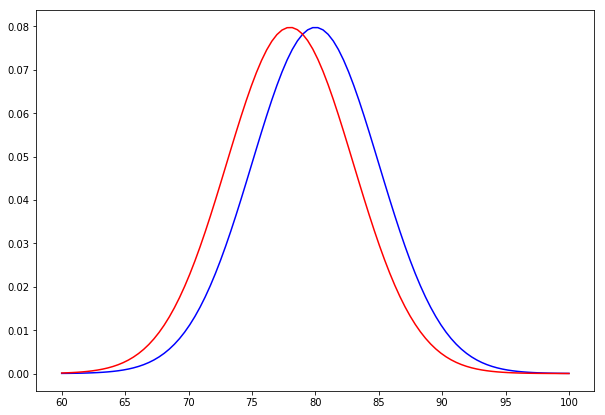

In [4]:
x = np.linspace(60, 100, 100)
plt.plot(x, attended.pdf(x), 'b')
plt.plot(x, not_attended.pdf(x), 'r')

## Ako vyzerajú naše "namerané" dáta?

In [5]:
a_sample

array([74.57184698, 84.98672723, 81.41489249, 72.46852643, 77.10699874,
       88.25718269, 67.86660378, 77.85543686, 86.32968129, 75.66629799])

In [6]:
na_sample

array([74.60556924, 77.52645516, 85.45694813, 74.80549002, 75.7800902 ,
       75.82824362, 89.02965041, 88.93393044, 83.02026949, 79.930932  ])

In [7]:
a_sample.mean()

78.65241944836836

In [8]:
na_sample.mean()

80.49175787118455

Študenti, čo *nechodili* na prednášky, majú v priemere vyššie finálne hodnotenie.

###  Môžem teda prehlásiť, že nechodenie na prednášky zlepšuje finálne hodnotenie na predmete?

<img src="img/to-mi-nevychadza.jpg" alt="Hm... To mi nevychadza" style="width: 800px; margin-left: auto; margin-right: auto;"/>

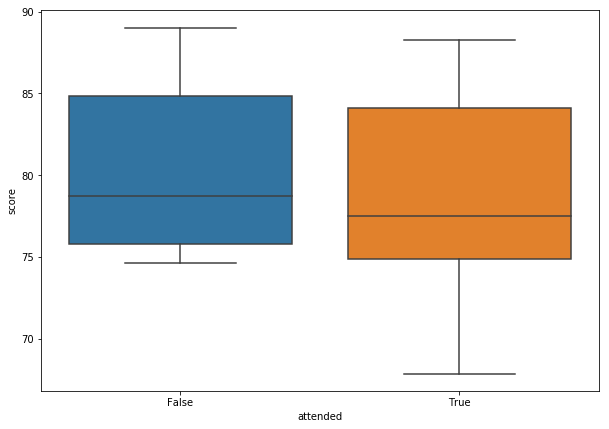

In [9]:
df = pd.DataFrame({'attended': np.repeat([True, False], 10), 'score': np.concatenate((a_sample, na_sample))})
sns.boxplot('attended', 'score', data=df)

## Základný problém je, že nemeriame populácie, ale len ich vzorky

Pracujeme teda len s odhadmi. **Ako si nimi môžeme byť istí?**

<img src="img/samples.png" alt="Populácia vs. vzorka" style="width: 900px; margin-left: auto; margin-right: auto;"/>

Nevieme skutočnú hodnotu priemeru, vieme len jej *odhad*. Podobne aj pri smerodajnej odchýlke.

#### Štatistika nám ponúka nástroje, ako zistiť, či sú v dvoch štatistických súboroch odlišnosti

* Je tam vôbec nejaký rozdiel? *Nejaký asi bude*

* Je ten rozdiel malý alebo veľký? *Tu nám štatistika veľmi nepomôže*

* Má nameraný rozdiel nejakú praktickú hodnotu? *Ani na toto nám štatistika nedá odpoveď*

* Je nameraný rozdiel skutočný, alebo len kvôli náhode? **Tu nám štatistika vie pomôcť!**

## Ako teda overiť, či je rozdiel medzi skupinami skutočný, a nie daný náhodou?

Štatistické testovanie hypotéz

### Pri testovaní hypotéz uvažujeme pravdepodobnosť, že daný výsledok sme mohli dosiahnuť, ak by experimentálna procedúra nemala žiadny efekt

Predpoklad nulového efektu (rozdielu) = **nulová hypotéza**

*Priemerné finálne hodnotenie študentov, čo chodili na prednášky, je rovnaké ako tých, čo na prednášky nechodili.*

Alternatívna hypotéza (ak by neplatila nulová)

*Priemerné finálne hodnotenie študentov, čo chodili na prednášky, je iné/väčšie/menšie ako tých, čo na prednášky nechodili.*

<img src="img/errors.png" alt="Chyba 1 a 2. rádu" style="width: 1000px; margin-left: auto; margin-right: auto;"/>

## Chyba 1. a 2. rádu

<img src="img/pregnant.jpg" alt="Chyba 1. a 2. rádu" style="width: 800px; margin-left: auto; margin-right: auto;"/>

## Postup pri štatistickom testovaní (1/2)

1. Sformulujem nulovú a alternatívnu hypotézu

2. Overím štatistické predpoklady distribúcií, z ktorých pochádzajú testované vzorky

3. Na základe splnenia/nesplnenia predpokladov vyberiem vhodnú testovaciu štatistiku $T$

4. Vyberiem akceptovateľnú pravedpodobnosť chyby 1. rádu $\alpha$ (najčastejšie 0.05)

## Postup pri štatistickom testovaní (2/2)

5. Na základe distribúcie testovacej štatistiky $T$ a hodnoty $\alpha$ určím *kritickú oblasť*, resp. *kritickú hodnotu*

6. Na základe pozorovaní určím hodnotu testovacej štatistiky $t_{obs}$

7. Ak $t_{obs}$ padne do kritickej oblasti, resp. ak plocha ohraničená $t_{obs}$ (tzv. $p$-hodnota) je menšia ako plocha kritickej oblasti ($\alpha$), zamietam nulovú hypotézu. V opačnom prípade ju nemôžem zamietnuť.

<img src="img/p-value.png" alt="P-hodnota a kritická oblasť" style="width: 1100px; margin-left: auto; margin-right: auto;"/>

Zdroj: https://stats.stackexchange.com/questions/124178/why-do-we-compare-p-value-to-significance-level-in-hypothesis-testing-of-mean

## One-tailed vs. two-tailed test

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

<img src="img/one-two-tailed.png" alt="One-tailed vs. two-tailed test" style="width: 1200px; margin-left: auto; margin-right: auto;"/>

## Už si len potrebujeme vybrať vhodný štatistický test!

<img src="img/tests.png" alt="Prehľad štatistických testov" style="width: 900px; margin-left: auto; margin-right: auto; float:left"/>
<img src="img/spitting-face.png" alt="Pľujúci meme" style="width: 400px; margin-left: auto; margin-right: auto;z-index:100"/>

## Ako to vyzerá v našom prípade?

<img src="img/tests-highlighted.png" alt="Prehľad štatistických testov" style="width: 1000px; margin-left: auto; margin-right: auto"/>

## Studentov t-test

t-štatistika bola predstavená v roku 1908 Williamom Sealy Gossetom v čase, keď pracoval ako chemik v pivovare Guinness.

<img src="img/William_Sealy_Gosset.jpg" alt="Autor Studentovho t-testu" style="width: 300px; margin-left: auto; margin-right: auto; float:left"/>
<img src="img/guinness.jpg" alt="Guiness" style="width: 400px; margin-left: auto; margin-right: auto"/>

t-test je založený na **t-distribúcii**.

t-distribúcia je podobná ako normálna distribúcia, ale má viac hmoty na chvostoch. So zväčšujúcim počtom pozorovaní sa približuje normálnej distribúcii.

Výpočet t-štatitiky (pre dve nezávislé vzorky):

$t = \frac{\overline{X_1} - \overline{X_2}}{s_p \sqrt{\frac{1}{n_1} - \frac{1}{n_2}}}$, $s_p = \sqrt{\frac{(n_1 - 1) s^2_{X_1} + (n_2 - 1) s^2_{X_2}}{n_1 + n_2  - 2}}$

t-test pre dve párové vzorky porovnáva, či je rozdiel dvojíc pozorovaní rôzny od nuly.

## Predpoklady t-testu

Hodnoty v súboroch sú z normálneho rozdelenia

Súbory pochádzajú z distribúcií s podobne veľkou varianciou (rozptylom hodnôt) - existuje korekcia t-testu pre distribúcie s rôznou varianciou (*Welchov t-test*).

*t-test je odolný voči miernym odchýlkam od týchto predpokladov.*

## Testovanie predpokladu normálnosti

1. Vizuálna kontrola pomocou histogramu alebo tzv. kvantil-kvantilového grafu (QQ grafu) - najmä pri veľkých vzorkách
2. Testom normálnosti, napr. pomocou **Shapiro-Wilkovho** testu.

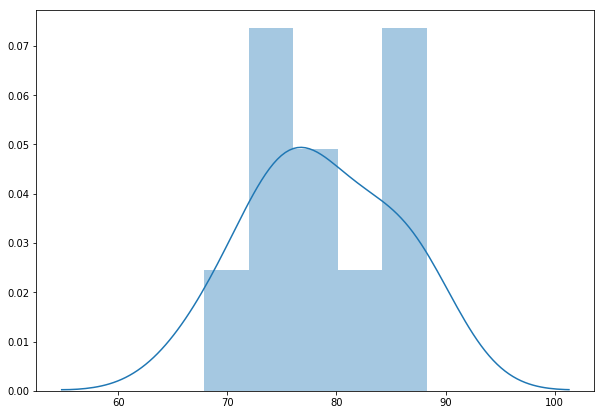

In [10]:
sns.distplot(a_sample, bins=5)

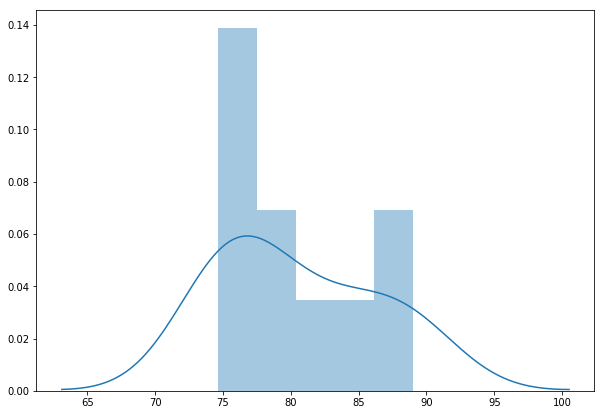

In [11]:
sns.distplot(na_sample, bins=5)

### Kvantil-kvantilový graf (QQ graf, angl. *QQ-plot*)

...je vizuálna metóda na určenie, či dve dátove sady pochádzajú z rovnakého rozdelenia. Najčastejšie sa porovnáva rozdelenie vzorky s teoretickým normálnym rozdelením. Bod na grafe zobrazuje hodnotu kvantilu v prvom a druhom porovnávanom datasete.

Ak sa rozdelenie dvoch dátových sád zhoduje (resp. rozdelenie vzorky s teoretickým normálnym rozdelením), výsledkom budú body ležiace na priamke.

In [12]:
plt.rcParams["figure.figsize"] = (6,4)

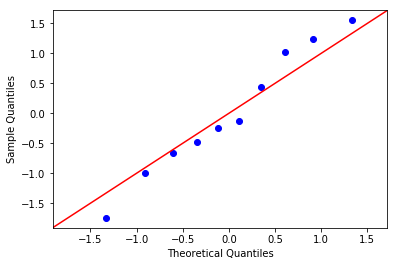

In [13]:
_ = sm.ProbPlot(a_sample, fit=True).qqplot(line='45')

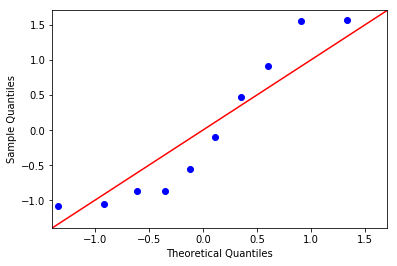

In [14]:
_ = sm.ProbPlot(na_sample, fit=True).qqplot(line='45')

### Ako interpretovať QQ graf?

<img src="img/qq-plot.png" alt="Interpretácia QQ grafu" style="margin-left: auto; margin-right: auto" width="600px"/>

Zdroj: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

### Shapiro-Wilkov test normálnosti

Shapiro-Wilkov test testuje nulovú hypotézu, že dáta pochádzajú z normálneho rozdelenia.

Ak je $p < 0,05$, nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Ak je $p > 0,05$, nulovú hypotézu nezamietame, teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelenia.

`scipy.stats.shapiro`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [15]:
stats.shapiro(a_sample)

(0.9674148559570312, 0.8658962845802307)

In [16]:
stats.shapiro(na_sample)

(0.8645600080490112, 0.0863415077328682)

## Test rovnakých variancií - Levenov test

Levenov test testuje nulovú hypotézu, že všetky vstupné vzorky pochádzajú z rozdelení s rovnakými varianciami.

Ak nulovú hypotézu nezamietame ($p > 0,05$), znamená to, že na základe dát nemôžeme prehlásiť, že by vzorky pochádzali z distribúcií s rôznymi varianciami.

In [17]:
stats.levene(a_sample, na_sample)

LeveneResult(statistic=0.043281726362187446, pvalue=0.8375315228644566)

## Overili sme predpoklady t-testu - môžeme ho použiť

*Ak by sa nám ich nepodarilo overiť, použili by sme neparametrickú verziu - **Mann-Whitneyho U test**.*

In [18]:
stats.ttest_ind(a_sample, na_sample)

Ttest_indResult(statistic=-0.6704597231719521, pvalue=0.511076194122041)

$p > 0.05$ => na základe dát **nemôžeme** zamietnuť nulovú hypotézu o tom, že priemery dvoch distribúcií sú rovnaké.

**Nedokázali sme tým však, že priemery sú rovnaké.**

## Ako je to možné?

Dáta sme generovali z rozdelení s rôznym priemerom.

**Chyba 2. rádu** - použili sme test s nedostatočnou silou.

<img src="img/underpowered.jpg" alt="Nedostatočná sila testu" style="margin-left: auto; margin-right: auto" width="500px"/>

## Štatistická sila = $1 - \beta$

Pravdepodobnosť, že nájdeme signifikantný rozdiel, ak exituje (zamietame $H_0$, keď je nepravdivá).

Pri nízkej sile testu nevieme identifikovať menšie efekty (rozdiely).

Vieme zvýšiť zväčšením počtu účastníkov (pozorovaní).

## Silu testu, resp. potrebný počet účastníkov/pozorovaní vieme dopredu vypočítať!

Potrebujeme na to odhadnúť *veľkosť efektu*.

Viacero spôsobov, napr. **Cohenovo d**.

$d = \frac{\overline{x_1} - \overline{x_2}}{s}$, $s = \sqrt{\frac{(n_1 - 1) s^2_{X_1} + (n_2 - 1) s^2_{X_2}}{n_1 + n_2  - 2}}$

malý efekt = 0,2, stredný efekt = 0,5, veľký efekt = 0,8

## V našom príklade rozdiel je, ale neboli sme schopní ho odmerať

Mali sme len 10 pozorovaní

In [19]:
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s

In [20]:
c_d = cohen_d(a_sample, na_sample)
c_d

0.29983870343763525

In [21]:
sm_stats.power.tt_ind_solve_power(c_d, len(a_sample), 0.05, None, 1)

0.0973725922436366

`statsmodels.stats.power.tt_ind_solve_power`:
https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html

## V literatúre sa vo všeobecnosti považuje za akceptovateľnú sila 0,8

In [22]:
sm_stats.power.tt_ind_solve_power(c_d, None, 0.05, 0.8, 1)

175.5723727806703

V skutočnosti by nám stačilo menej pozorovaní (keďže sme dáta generovali, poznáme skutočné hodnoty priemerov a smerodajnej odchýlky):

In [23]:
sm_stats.power.tt_ind_solve_power((m1-m2)/s, None, 0.05, 0.8, 1)

99.08032683981111

## t-test znovu, tentokrát s väčším počtom pozorovaní (100 pre každú skupinu)

In [24]:
a_sample2 = attended.rvs(100)
na_sample2 = not_attended.rvs(100)

In [25]:
a_sample2.mean()

79.98243792881826

In [26]:
na_sample2.mean()

78.08512573238116

In [27]:
plt.rcParams["figure.figsize"] = (10,7)

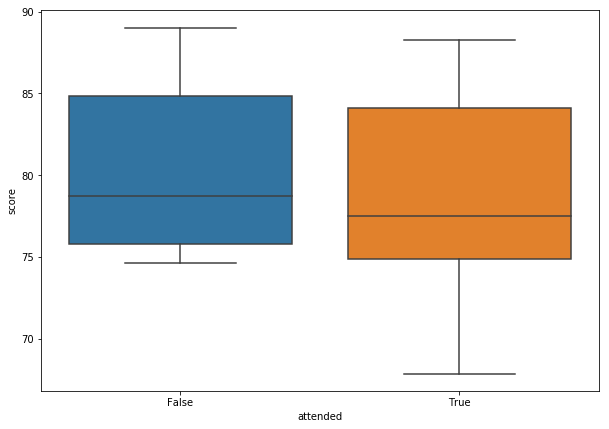

In [28]:
df2 = pd.DataFrame({'attended': np.repeat([True, False], 100), 'score': np.concatenate((a_sample2, na_sample2))})
sns.boxplot('attended', 'score', data=df)

In [29]:
stats.ttest_ind(a_sample2, na_sample2)

Ttest_indResult(statistic=2.632935293205359, pvalue=0.009133081657394739)

## Na základe t-testu zamietame nulovú hypotézu

Ale odhady priemerov stále nezodpovedajú skutočným hodnotám.

*Ako zistiť presnosť tohto odhadu, resp. aká je skutočná hodnota priemeru?*

**Intervaly spoľahlivosti**

## Intervaly spoľahlivosti

Miera spoľahlivosti $C$ (napr. 95%) nám hovorí, v koľkých percentách zostavených intervalov spoľahlivosti by sa nachádzala skutočná odhadovaná hodnota populácie (napr. priemer), ak by som z populácie testoval nekonečne veľa vzoriek.

Pre neznámu smerodajnú odchýlku používame hodnoty z t-distribúcie:

$$ \overline{x} \pm t_{\alpha}(n-1)\frac{s}{\sqrt{n}} $$

$$ \alpha = \frac{1-C}{2} $$

In [30]:
sms.DescrStatsW(a_sample).tconfint_mean()

(73.99122651163154, 83.31361238510519)

In [31]:
sms.DescrStatsW(na_sample).tconfint_mean()

(76.39447730971264, 84.58903843265645)

In [32]:
plt.rcParams["figure.figsize"] = (6,4)

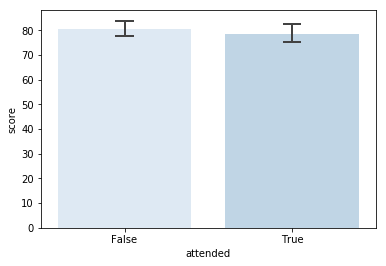

In [33]:
sns.barplot(x='attended', y='score', data=df, capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

In [34]:
sms.DescrStatsW(a_sample2).tconfint_mean()

(78.8523324999322, 81.11254335770434)

In [35]:
sms.DescrStatsW(na_sample2).tconfint_mean()

(77.20916499630897, 78.96108646845337)

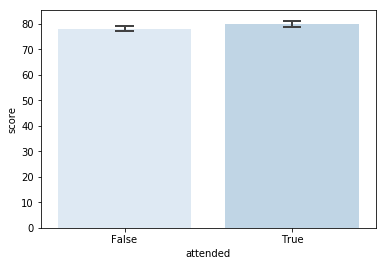

In [36]:
sns.barplot(x='attended', y='score', data=df2, capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

## V našom príklade sme mali dve skupiny - čo ak by sme ich mali viac?

$\alpha = 0.05$

* 1 test: 5% pravdepodobnosť chyby
* 2 testy: $1 – (1-0,05)^2 \approx 9.75\%$ pravd. chyby
* 10 testov: $1 – (1-0,05)^{10} \approx 40.1\%$ pravd. chyby
* 25 testov: $1 – (1-0,05)^{25} \approx 72.3\%$ pravd. chyby

## S rastúcim počtom testovaných skupín rastie chyba 1. rádu

<img src="img/type-one-error.png" alt="Chyba 1. rádu" style="margin-left: auto; margin-right: auto; float: left"/>
<img src="img/chosen-one.gif" alt="You were the chosen one!" style="margin-left: auto; margin-right: auto"/>

## Chyby 1. rádu môžeme kontrolovať

**FWER (Familywise error rate)** = Pravdepodobnosť, že zamietneme aspoň jednu pravdivú $H_i$ (*spravíme chybu 1. rádu*) pri testovaní skupiny nulových hypotéz

**Bonferroniho korekcia** 

$p_i \leq \alpha/m$, kde $m$ je počet hypotéz (párových testov)

Majme 4 testovacie podmienky, $\alpha = 0.05$ => 6 párových testov, $p_i \leq 0.05/6 = 0.0083$

*Alebo ešte lepšie - použiť test pre viacero skupín (napr. ANOVA) v kombinácii s párovými post-hoc testami.*

## Reportovať p-hodnotu nestačí

Hovorí len o tom, či existuje nejaký efekt

Je závislá od veľkosti vzorky; pri dostatočne veľkých vzorkách takmer vždy zistíme signifikantný rozdiel

Treba reportovať aj **veľkosť efektu**.

http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174

In [37]:
attended2 = stats.norm(80, 5)
not_attended2 = stats.norm(79.9, 5)

a_sample3 = attended2.rvs(100000)
na_sample3 = not_attended2.rvs(100000)

In [38]:
a_sample3.mean()

80.00676932496977

In [39]:
na_sample3.mean()

79.9229616181292

In [40]:
stats.ttest_ind(a_sample3, na_sample3)

Ttest_indResult(statistic=3.7521883658339537, pvalue=0.00017534714097220807)

## Už viete pomocou štatistiky testovať hypotézy

<img src="img/peter-parker-happy-meme.jpg" alt="I'm so happy" style="margin-left: auto; margin-right: auto"/>

## Čo si odniesť z dnešnej prednášky

* rozdiel v pozorovaniach (priemeroch) môže byť daný náhodou

* štatistika nám poskytuje nástroje, ako rozhodnúť, či sú pozorované rozdiely významné (nie dané náhodou); nehovorí však, či je zistený rozdiel praktický (závisí vždy od konkrétneho problému)

* je veľa testov - treba vedieť, ktorý kedy môžem použiť (väčšinou majú predpoklady, ktoré musia byť splnené)

* ak nezamietam nulovú hypotézu, neznamená, že som ju dokázal - je dosť možné, že som len použil test s nedostatočnou silou (mal som málo pozorovaní) na to, aby som ju mohol zamietnuť

* pozor na opakované testovania nad rovnakými dátami - rastie pravdepodobnosť chyby 1. rádu

## Je to všetko?

*Zďaleka nie...* Ďalšie testy: ANOVA, ANOCOVA, MANOVA, Mixed-effects model, ...

Regresie (lineárna, logistická, ...)

<img src="img/darth.jpg" alt="If you only new the power of Bayesian statistics" style="margin-left: auto; margin-right: auto"/>

## Frekvenčná vs. bayesovská štatistika

Všetko na dnešnej prednáške sa týkalo *frekvenčnej* štatistiky.

Táto je založená na predstave, že pravdepodobnosť je **frekvencia**, s ktorou nastanú isté javy.

Bayesovská štatistika vníma pravdepodobnosť ako vyjadrenie **neistoty** ohľadom nejakej informácie alebo javu.

*Viac niekedy nabudúce alebo na inom kurze...*

## Online kurzy

### Coursera

- Statistical Inference (https://www.coursera.org/learn/statistical-inference; súčasť *Data Science* špecializácie)
- Statistics with Python Specialization (https://www.coursera.org/specializations/statistics-with-python)
- Statistics with R Specialization (https://www.coursera.org/specializations/statistics)

### Udemy

- Introduction to Statistics as Covered in the Social, Behavioral, and Natural Sciences (https://www.udemy.com/course/introduction-to-statistics/)
- Statistics for Business Analytics and Data Science A-Z (https://www.udemy.com/course/data-statistics/)

### Iné

- Statistics (Khan Academy): https://www.youtube.com/playlist?list=PL1328115D3D8A2566

## Zdroje

Izabela & Krzysztof Krejtz: Statistical Analysis with R (Lecture), January 2016.

Brian Caffo: Little Inference Book (https://leanpub.com/LittleInferenceBook)

Andy Fields, Jeremy Miles & Zoe Field: Discovering Statistics Using R (https://www.discoveringstatistics.com/books/discovering-statistics-using-r/)

Alex Reinhard: Statistics Done Woefully Wrong (https://www.statisticsdonewrong.com/)

Will Kurt: Bayesian Statistics the Fun Way (https://nostarch.com/learnbayes)

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2019-w05